In [1]:
cd /notebooks/

/notebooks


# Get data from data storage

In [16]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import boto3
import os

In [5]:
access_key = os.environ['ACCESS_KEY']
s3r = boto3.resource('s3', 
        aws_access_key_id=access_key,
        aws_secret_access_key=os.environ['SECRET_KEY'], 
        endpoint_url='https://s3.gwdg.de/')
bucket = s3r.Bucket('sinzlab-data')



In [6]:
# filefilter = 'Sensorium2022Train/static21067-10-18-GrayImageNet'
# for obj in bucket.objects.filter(Prefix=filefilter)):
    # print(obj.key)
    # bucket.download_file(bucket_name, obj.key, obj.key)
bucket.download_file( 
        'Sensorium2022Train/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6.zip',
        'data/sensorium21067-10-18.zip')

In [8]:
!unzip -q data/sensorium21067-10-18.zip -d data/

# Explore the data

In [11]:
ls data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6

data/  meta/


In [12]:
ls data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/data

behavior/  images/  pupil_center/  responses/


In [13]:
ls data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/data/images

0.npy     1673.npy  2348.npy  3022.npy  3699.npy  4373.npy  5048.npy  5723.npy
1.npy     1674.npy  2349.npy  3023.npy  37.npy    4374.npy  5049.npy  5724.npy
10.npy    1675.npy  235.npy   3024.npy  370.npy   4375.npy  505.npy   5725.npy
100.npy   1676.npy  2350.npy  3025.npy  3700.npy  4376.npy  5050.npy  5726.npy
1000.npy  1677.npy  2351.npy  3026.npy  3701.npy  4377.npy  5051.npy  5727.npy
1001.npy  1678.npy  2352.npy  3027.npy  3702.npy  4378.npy  5052.npy  5728.npy
1002.npy  1679.npy  2353.npy  3028.npy  3703.npy  4379.npy  5053.npy  5729.npy
1003.npy  168.npy   2354.npy  3029.npy  3704.npy  438.npy   5054.npy  573.npy
1004.npy  1680.npy  2355.npy  303.npy   3705.npy  4380.npy  5055.npy  5730.npy
1005.npy  1681.npy  2356.npy  3030.npy  3706.npy  4381.npy  5056.npy  5731.npy
1006.npy  1682.npy  2357.npy  3031.npy  3707.npy  4382.npy  5057.npy  5732.npy
1007.npy  1683.npy  2358.npy  3032.npy  3708.npy  4383.npy  5058.npy  5733.npy
1008.npy  1684.npy  2359.npy  3033.npy  3709.npy  438

In [15]:
img = np.load('data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/data/images/0.npy')
img.shape

(1, 144, 256)

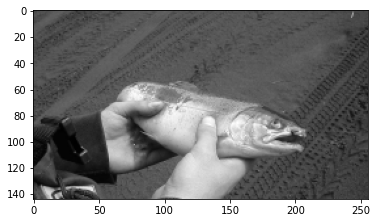

In [18]:
plt.imshow(img.squeeze(), cmap='gray')

## Task 1: Write a pytorch data set

In [ ]:
from torch.utils.data import Dataset
import os

class FileTreeDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir

    def __len__(self):
        ...

    def __getitem__(self, idx):

        return ... # a tuple of images and responses


---

In [25]:
from neuralpredictors.data.datasets import FileTreeDataset

root_dir = 'data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6'
dat = FileTreeDataset(root_dir, 'images', 'responses')

In [30]:
dat.trial_info.tiers, dat.trial_info.frame_image_id

(array(['validation', 'train', 'train', ..., 'train', 'train', 'train'],
       dtype='<U10'),
 array([1301, 5927, 3982, ...,  464,  819, 3025]))

## Task 2: Write a sampler

In [33]:
from torch.utils.data import Sampler


In [34]:
from torch.utils.data import Sampler

class RandomSubsetSampler(Sampler):

    def __init__(self, indices, num_samples=None):
        ...
        
    def __iter__(self):
        indices = # get random list of indices
        return iter(indices)

    def __len__(self):
        ...

---

In [58]:
from digital_twin_library import RandomSubsetSampler

In [49]:
train_sampler = RandomSubsetSampler(dat.trial_info.tiers == 'train')
train_sampler

Random Subset Sampler on an array of 4473, 4473 samples per iteration and replace=False

In [53]:
test_sampler = RandomSubsetSampler(dat.trial_info.tiers == 'test')
val_sampler = RandomSubsetSampler(dat.trial_info.tiers == 'validation')
val_sampler

Random Subset Sampler on an array of 523, 523 samples per iteration and replace=False

## Implement a dataloader in pytorch and run through the training data

In [50]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dat, sampler=train_sampler, batch_size=32)

In [56]:
for images, responses in train_loader:
    print(responses)
    print(batch[0].shape, batch[1].shape)
    break

tensor([[8.9558e-09, 9.7385e-09, 1.7905e-09,  ..., 8.0943e-01, 4.2902e+00,
         1.1077e-07],
        [2.2740e-08, 1.2434e+01, 2.1819e-10,  ..., 5.3673e-09, 5.4698e-08,
         4.4663e-01],
        [3.4232e+00, 1.1975e-07, 9.3909e+00,  ..., 4.1419e-01, 7.9190e-09,
         2.0264e+00],
        ...,
        [2.8250e-08, 3.1079e-08, 1.2122e-08,  ..., 1.4507e+00, 3.2492e-02,
         1.0565e-08],
        [8.0867e-01, 7.7449e-01, 3.2186e+00,  ..., 3.5991e-07, 2.3674e-08,
         4.0935e-07],
        [2.9644e-08, 3.1676e-09, 9.7704e-09,  ..., 2.2028e-07, 8.6554e-09,
         4.2934e-08]])
torch.Size([32, 1, 144, 256]) torch.Size([32, 8372])


Let's check for a GPU and set the device accordingly

In [57]:
# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")
    print("Number of CUDA devices:", torch.cuda.device_count())
    
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")


CUDA is available!
Number of CUDA devices: 1
Device 0: NVIDIA GeForce RTX 2080 Ti


In [75]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
for images, responses in train_loader:
    images = images.to(device)
    responses = responses.to(device)
    print(responses)
    break

tensor([[6.7330e-07, 1.9871e-01, 6.8082e-08,  ..., 3.5575e-07, 3.7586e-01,
         9.0148e-01],
        [5.8178e+00, 2.9159e-08, 3.4823e-01,  ..., 4.2222e-08, 6.9726e-01,
         5.2759e-01],
        [1.7223e-09, 2.7813e-09, 4.4050e-10,  ..., 1.7732e-08, 3.9359e-07,
         8.2162e+00],
        ...,
        [3.9825e-02, 1.6292e-07, 3.0160e-09,  ..., 3.3960e+00, 1.5639e+00,
         5.9703e-07],
        [7.8346e-09, 5.2391e-09, 1.1435e-09,  ..., 1.5769e+01, 9.6961e-09,
         7.4543e-08],
        [3.8221e+00, 4.2757e-08, 1.6026e-01,  ..., 1.0086e-01, 5.6597e-09,
         1.3167e-07]], device='cuda:0')
